Linear models such as Logistic Regression or Support Vector Machines have been very successfull in machine learning and in NLP. In this module, we'll take a look at using linear models.

## Key Takeaway
Anyone can run a linear model in two lines of code. The "secret" to getting them to work is representing our text in a way that is convenient for a linear model (e.g. linearly seperable, or seperable in a space the model can project to ).

In NLP, the default representation is the [Bag of Words model](https://en.wikipedia.org/wiki/Bag-of-words_model). The bag of words model basically says "Our linear algorithms and random forests need each example to be a vector. So let's take a document/sentence/phrase and make it a vector by counting which words are in it "
This is easiest understood with code :

In [1]:
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
# we have two documents that we want to vectorize
documents = ["The quick brown fox jumped over the lazy dog",
             "The fat brown monkey jumped under the active cat"]

# intiialize the vectorizer
C =CountVectorizer() 

# Fit on countvectorizer counts the total instances of each unique word in all documents, and creates an empty vector
C.fit(documents)

# Transform then does the counting of each word and puts that into our vector
C.transform(documents).todense()

matrix([[0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 0],
        [1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 1]])

In [17]:
# If we now just transform on a new document, it ignores all the words we didn't "fit" to previously
C.transform(["Another document about a dog"]).todense()

matrix([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


## Choosing tokens
Since linear models basically look at the frequency of words, one of the most important decisions we need to make is **what is a word** in our world. In addition, the more "words" we have, the more features our model will have and thus the more data we'll need to train on. 

## Our problem
Like in problem set 1, we still want to understand if a given number is even or odd, based on the word representation. In problem set 1, we did this with Regular Expressions. Now we'll do it with "machine learning" 
### Our Big problem
Our data looks like 
```
vierzehnmillionfünfhundreteinundzwanzigtausendvierhundretfünfzehn
```
How can we get it into the bag of words model ? And how can we do it in a way that is meaningfull towards the problem we want to solve ?

In [28]:
from sklearn import svm
from sklearn.pipeline import Pipeline
from utils.numtoWord import createNum2WordDict

# Given a vectorizer and model, returns a Pipeline object that runs them both
def makePipeline(vectorizer,model=svm.SVC()):
    return Pipeline([('vectorizer',vectorizer),('model',model)])

# Returns amount tuples of "text-number" label to work with 
# label is 0 if number is even, 1 if it is odd
def makeExamples(amount=1000,high=10**18):
    data = createNum2WordDict(amount,high=high)    
    examples = list(data.values())
    labels = list(map(lambda x:x %2,data.keys())) # %2 is python trick to say return 1 if divisible by 2, or 0 if not
    return examples, labels

### Build and run a  pipeline

Use the pipeline shown above to train and test a model. Use [SkLearn metrics](http://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics) to evaluate it. 

1. Is it any  good ? 
2. Why is it bad ? Hint - Look at the vocabulary the vectorizer has 
3. Discuss - Is their anything we can do to the model to improve this ?

In [43]:
C = CountVectorizer() # intiialize a  vectorizer. THIS IS WHERE YOU SHOULD BE DOING MOST OF YOUR WORK
P = makePipeline(C) # Feed the vectorizer into the pipeline factory
examplesTrain, labelsTrain = makeExamples(1000,10**4) #Create some training data, 1000 samples up to 10,000
examplesTest, labelsTest = makeExamples(1000,10**4) # Create some test data, 1000 samples up to 10,000
P.fit(examplesTrain,labelsTrain) # Fit the vectorizer and train the model

Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
       ...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

### Examine what your vectorizer is doing

In [44]:
# named_steps['x'] allows you to go to the named component of the pipeline and just run that
# take the 3rd row of examplesTrain
print(examplesTrain[4])
P.named_steps['vectorizer'].transform([examplesTrain[4]]).todense()

viertausendsechshundretneun


matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [45]:
# see how many vectorized names there are
# numbers can be resampled, so there won't be quite 1000 probably
print(len(P.named_steps['vectorizer'].get_feature_names()))
# show first 10 of my vectorizing names
print(list(P.named_steps['vectorizer'].get_feature_names()[:10]))

954
['achthundretachtundfünfzig', 'achthundretachtzehn', 'achthundreteinundsechzig', 'achthundretfünfundsiebzig', 'achthundretundvierzig', 'achttausendachthundretachtundfünfzig', 'achttausendachthundretdreiundsiebzig', 'achttausendachthundreteinunddreiβig', 'achttausendachthundreteinundvierzig', 'achttausendachthundretneunundneunzig']


### Evaluate how good the pipeline is

In [63]:
from sklearn.metrics import accuracy_score
predictions = P.predict(examplesTest) # Predict results
acc = accuracy_score(labelsTest,predictions)
print('Model accuracy is '+str('{:.2f}%'.format(acc)))

Model accuracy is 0.48%


# Excercise 2 - Ngrams and char tokenizer
Look at the documentation for the [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) 
Focus on the parameters 
* ngram_range
* analyzer

Train and evaluate a new pipeline with analyzer set to *'char'*. Experiment with values of ngram_range. 
What do different values of ngram_range do to ? 
* The speed of training ?
* The accuracy of your model ? 
* How does adding more training data effect it ? 

**hint** You should be looking at plots like this one to understand the effect of ngrams and amount of training data
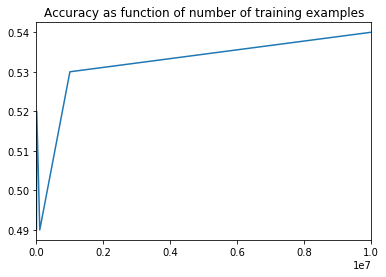




In [2]:
#Your code goes here

# Excercise 3 - Custom Tokenizer

* Examine the vocabulary the your vectorizer is learning. Is it adequate ? 
* Use the techniques we saw in Problem set 1 to write a custom tokenizer

Your tokenizer should bhelp reach a model of around 80% accuracy 
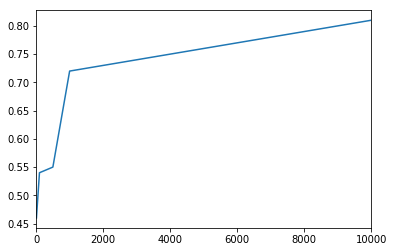

A custom tokenizer looks like this
```python
def tokenizer(doc):
    return list(doc)  # retruns the individual chars in the document
    
```

And you use it like this
```p
C =CountVectorizer(tokenizer=tokenizer,max_features=1000) # intiialize the vectorizer

In [205]:
def tokenizer(doc):
    doc = ''.join(doc.split('hundret')[-1:])
    return doc.split('und')
res ={}
for num in [10,100,500,1000,10000]:
    C =CountVectorizer(tokenizer=tokenizer,max_features=1000) # intiialize the vectorizer
    P = makePipeline(C) # Feed the vectorizer into the pipeline factory
    examplesTrain, labelsTrain = makeExamples(num,10**8) #Create some training data
    examplesTest, labelsTest = makeExamples(1000,10**8) # Create some test data
    P.fit(examplesTrain,labelsTrain) # Fit the vectorizer and train the model.
    predictions = P.predict(examplesTest) # Predict results
    res[num] =(accuracy_score(y_true=labelsTest,y_pred=predictions))

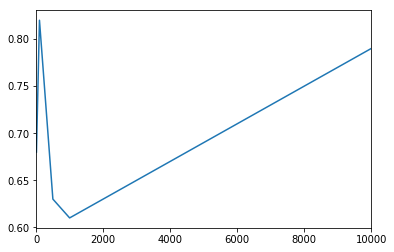

In [206]:
pd.Series(res).plot()

In [160]:
examplesTrain[:10], labels[:10]

(['achthundreteinundvierzigtausendzweihundretsechszehn',
  'fünftausendachthundretachtundachtzig',
  'zweihundretfünfunddreiβigtausendfünfhundretdreiundzwanzig',
  'neunhundretvierundsiebzigtausendfünfundachtzig',
  'neunhundretundvierzigtausendachthundretsieben',
  'vierhundretzweiundsechzigtausendeinundneunzig',
  'siebenhundretsechsundachtzigtausendsiebenhundretzwei',
  'zweihundretfünfundachtzigtausendzweihundretein',
  'achthundreteinundachtzigtausendneunhundretundvierzig',
  'vierhundretachttausendachthundretfünfundfünfzig'],
 [0, 0, 0, 0, 1, 1, 0, 1, 0, 1])